作提供信息的可视化（有时称为绘图）是数据分析中最重要任务之一。可视化可能是探索过程的一部分，例如，帮助识别异常值或所需的数据转换，或者为建模提供一些想法。对于其他人来说，构建网络交互式可视化可能是最终目标。Python有很多附加库可以用来制作静态或动态的可视化文件，主要关注`matplotlib`（http://matplotlib.sourceforge.net ）和以它为基础的库。

`matplotlib`是一个用于生成出版级质量图表（通常是二维的）的桌面绘图包。该项目由John Hunter于2002年发起，目的在于在Python环境下进行MATLAB风格的绘图。matplotlib和IPython社区合作简化了IPython shell（目前是Jupyter notebook）的交互式绘图。`matplotlib`支持所有操作系统上的各种GUI后端，还可以将可视化导出为所有常见的矢量和光栅图形格式（PDF、SVG、JPG、PNG、BMP、GIF等）。除了少数图表之外，后续几乎所有的图形都是使用`matplotlib`生成的。

随着时间的推移，`matplotlib`已经产生了一些数据可视化的附加工具包，使用`matplotlib`进行底层绘图。`seaborn`（http://seaborn.pydata.org ）就是其中之一，将在后面介绍。

学习本章示例代码最简单的方式就是在Jupyter notebook中使用交互式绘图。在进行设置时，需要在Jupyter notebook中执行以下语句：

In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook

## 9.1　简明matplotlib API入门
在使用matplotlib时，使用以下的导入惯例：

In [2]:
import matplotlib.pyplot as plt

在Jupyter中运行`%matplotlib notebook`（或在IPython中运行`%matplotlib`），就可以尝试生成一个简单的图形。如果所有的设置都正确，则一个图形就会出现：

In [3]:
data = np.arange(8)

data

array([0, 1, 2, 3, 4, 5, 6, 7])

<IPython.core.display.Javascript object>


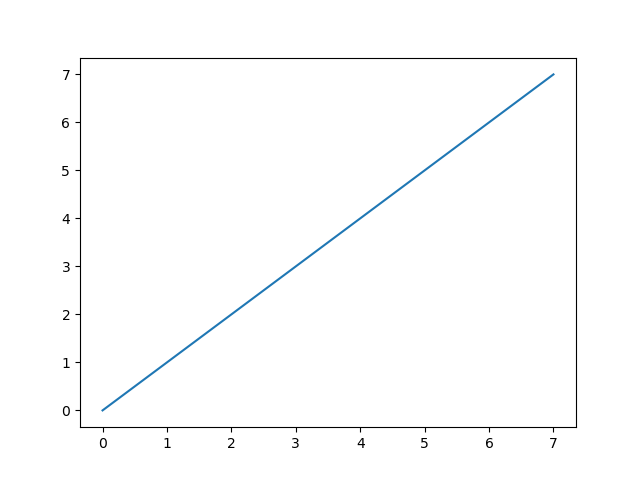

In [4]:
plt.plot(data)
plt.show()

尽管seaborn等库和pandas内建的绘图函数可以处理大部分绘图的普通细节，但如果想在提供的函数选项之外进行定制则需要学习一些matplotlib的API。

> 没有足够的篇幅来对`matplotlib`的功能广度和深度进行全面介绍。但介绍的内容应该是足以入门。`matplotlib`的可视化作品库和文档是学习高级功能的最佳资源。

### 9.1.1　图片与子图
matplotlib所绘制的图位于图片（Figure）对象中。可以使用`plt.figure`生成一个新的图片：

<IPython.core.display.Javascript object>


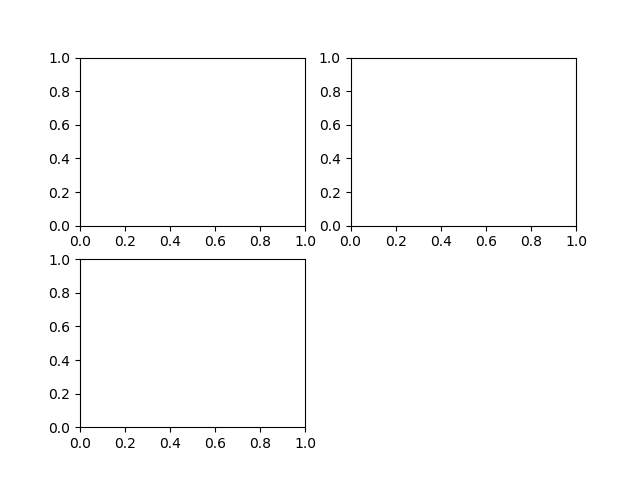

In [5]:
fig = plt.figure()

在IPython中，一个空白的绘图窗口就会出现，但在Jupyter中则没有任何显示，直到我们使用一些其他命令。`plt.figure`有一些选项，比如`figsize`是确保图片有一个确定的大小以及存储到硬盘时的长宽比。

不能使用空白的图片进行绘图。需要使用add_subplot创建一个或多个子图（subplot）：

In [6]:
ax1 = fig.add_subplot(2, 2, 1)

上面代码的意思是图片应该是2×2的（最多四个图形），并且选择了四个图形中的第一个（序号从1开始）。接着创建了两个子图：

In [7]:
ax2 = fig.add_subplot(2, 2, 2)

ax3 = fig.add_subplot(2, 2, 3)

> 使用Jupyter notebook时有个细节需要注意，在每个单元格运行后，图表被重置，因此对于更复杂的图表，必须将所有的绘图命令放在单个的notebook单元格中。（现在貌似已经没有这个问题了，能够在原有的图形上绘图了。）

将下面这些代码在同一个单元格中运行：

<IPython.core.display.Javascript object>


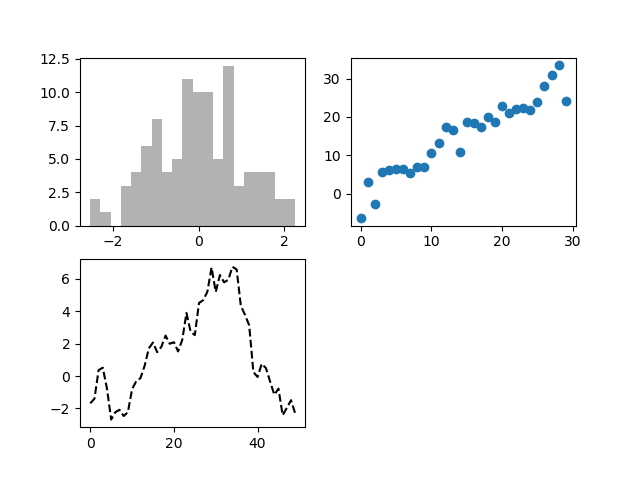

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

当输入绘图命令`plt.plot([1.5,3.5,-2,1.6])`，matplotlib会在最后一个图片和子图（如果需要的话就创建一个）上进行绘制，从而隐藏图片和子图的创建。

In [9]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

`'k--'`是用于绘制黑色分段线的style选项。`fig.add_subplot`返回的对象是Axes Subplot对象，使用这些对象可以直接在其他空白的子图上调用对象的实例方法进行绘图：

In [10]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [11]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

可以在matplotlib的官方文档（http://matplotlib.sourceforge.net ）中找到完整的图形类型。

使用子图网格创建图片是非常常见的任务，所以matplotlib包含了一个便捷方法`plt.subplots`，它创建一个新的图片，然后返回包含了已生成子图对象的NumPy数组：

<IPython.core.display.Javascript object>


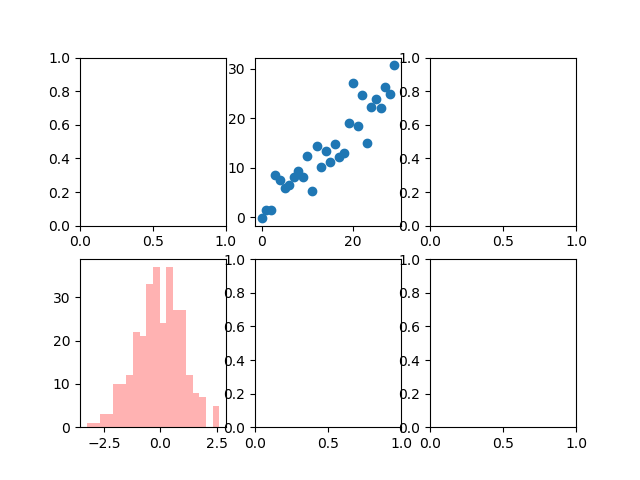

(array([ 1.,  1.,  3.,  3., 10., 10., 12., 22., 21., 33., 37., 24., 37.,
        27., 27., 12.,  8.,  7.,  0.,  5.]),
 array([-3.28026838, -2.98521576, -2.69016314, -2.39511052, -2.1000579 ,
        -1.80500528, -1.50995266, -1.21490004, -0.91984742, -0.6247948 ,
        -0.32974218, -0.03468956,  0.26036306,  0.55541568,  0.8504683 ,
         1.14552092,  1.44057355,  1.73562617,  2.03067879,  2.32573141,
         2.62078403]),
 <a list of 20 Patch objects>)

In [12]:
fig, axes = plt.subplots(2, 3)
# 这里的图形需要通过对象的属性实现，同时需要在Jupter的同一个代码块中。
axes[0,1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
axes[1,0].hist(np.random.randn(300), bins=20, color='r', alpha=0.3)

In [13]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac55ac5240>,
      dtype=object)

这是非常有用的，因为数组axes可以像二维数组那样方便地进行索引，例如，`axes[0,1]`。也可以通过使用`sharex`和`sharey`来表明子图分别拥有相同的x轴或y轴。当在相同的比例下进行数据对比时，`sharex`和`sharey`会非常有用；此外，matplotlib还可以独立地缩放图像的界限。

#### 9.1.1.1　调整子图周围的间距

默认情况下，matplotlib会在子图的外部和子图之间留出一定的间距。这个间距都是相对于图的高度和宽度来指定的，所以如果通过编程或手动使用GUI窗口来调整图的大小，那么图就会自动调整。可以使用图对象上的`subplots_adjust`方法更改间距，也可以用作顶层函数：

In [14]:
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

`wspace`和`hspace`分别控制的是图片的宽度和高度百分比，以用作子图间的间距。下面是一个小例子，将这个间距一直缩小到零：

<IPython.core.display.Javascript object>


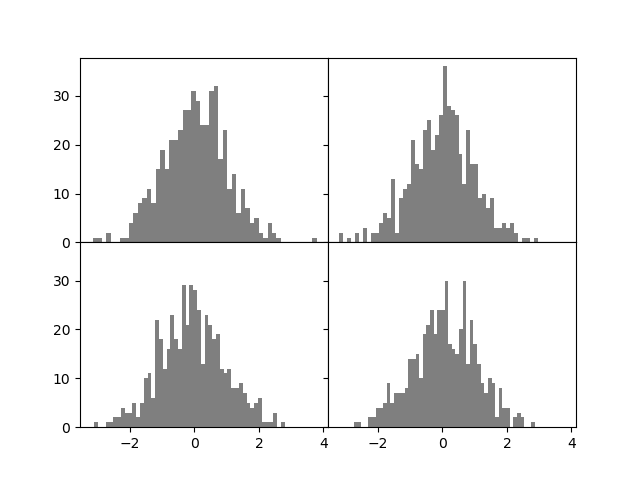

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

注意到轴标签是存在重叠的。matplotlib并不检查标签是否重叠，因此在类似情况下需要通过显式指定刻度位置和刻度标签的方法来修复轴标签。

### 9.1.2　颜色、标记和线类型
matplotlib的主函数`plot`接收带有x和y轴的数组以及一些可选的字符串缩写参数来指明颜色和线类型。例如，要用绿色破折号绘制x对y的线，需要执行：

<IPython.core.display.Javascript object>


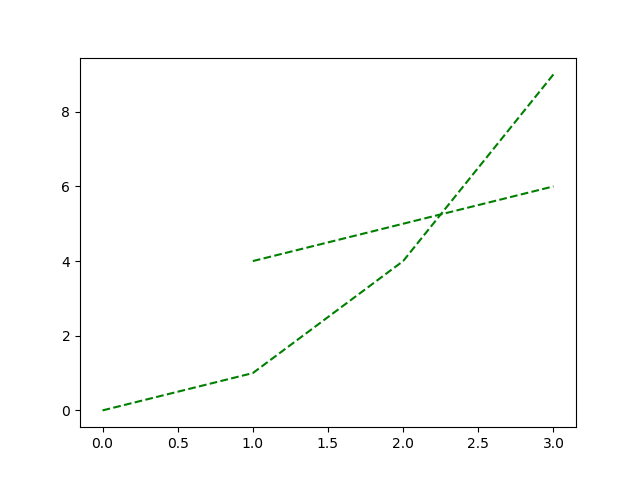

In [16]:
fig = plt.figure()
plt.plot([1,2,3], [4,5,6], 'g--')
plt.show()

这种在字符串中指定颜色和线条样式的方式是方便的。在实践中，如果以编程方式创建绘图，则可能不希望将字符串混合在一起以创建具有所需样式的图表。同样的图表可以使用更为显式的方式来表达：

In [17]:
plt.plot(np.arange(4), np.arange(4)**2, linestyle='--', color='g')

有很多颜色缩写被用于常用颜色，但是可以通过指定十六进制颜色代码的方式来指定任何颜色（例如`'#CECECE'`）。参考`plot`函数的文档字符串可以看到全部的线类型。

折线图还可以有标记用来凸显实际的的数据点。由于matplotlib创建了一个连续性折线图，插入点之间有时并不清除点在哪。标记可以是样式字符串的一部分，样式字符串中线类型、标记类型必须跟在颜色后面：

<IPython.core.display.Javascript object>


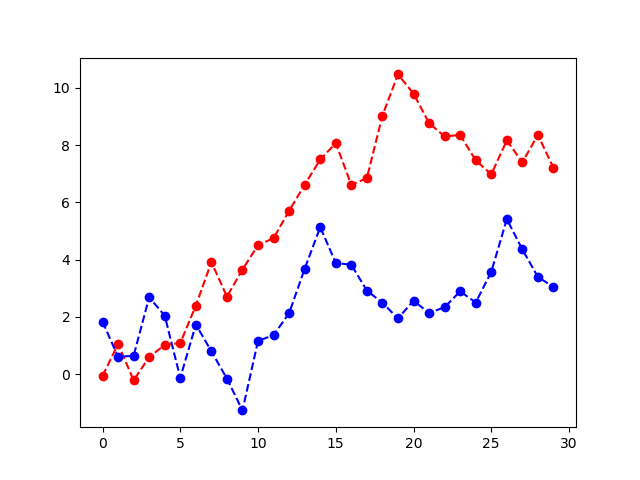

In [18]:
from numpy.random import randn
fig = plt.figure()
plt.plot(randn(30).cumsum(), 'ro--')

上面的代码可以写得更为显式：

In [19]:
plt.plot(randn(30).cumsum(), color='b', linestyle='dashed', marker='o')

对于折线图，后续的点默认是线性内插的。可以通过drawstyle选项进行更改：

<IPython.core.display.Javascript object>


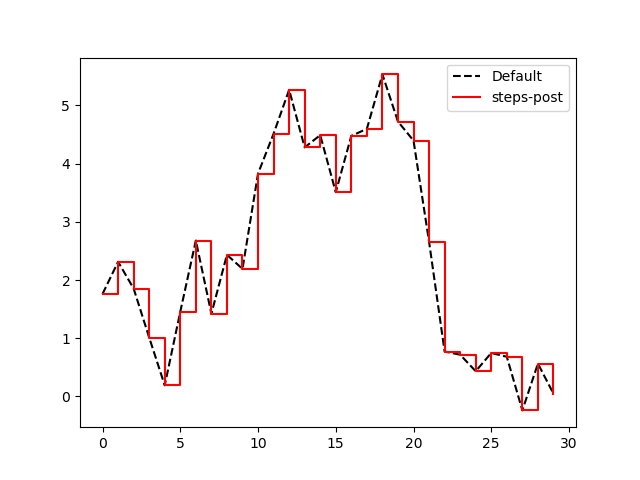

In [20]:
fig = plt.figure()
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

In [21]:
plt.plot(data, 'r-', drawstyle='steps-post', label='steps-post')

In [22]:
plt.legend(loc='best')

在运行代码后会有像`<matplotlib.lines.Line2D at...>`这样的输出。matplotlib返回的对象引用了刚刚添加的图表子组件。很多时候可以安全地忽略这些输出。这里，由于向`plot`传递了`label`，可以使用`plt.legend`为每条线生成一个用于区分的图例。

> 无论在用数据绘图时是否传递了`label`选项，都必须调用`plt.legend`（如果有轴的引用，也可以用`ax.legend`）来生成图例。

### 9.1.3　刻度、标签和图例
对于大多数图表修饰工作，有两种主要的方式：使用程序性的`pyplot`接口（即`matplotlib.pyplot`）和更多面向对象的原生matplotlib API。

`pyplot`接口设计为交互式使用，包含了像`xlim`、`xticks`和`xticklabels`等方法。这些方法分别控制了绘图范围、刻度位置以及刻度标签。可以在两种方式中使用：

* 在没有函数参数的情况下调用，返回当前的参数值（例如`plt.xlim()` 返回当前的x轴绘图范围）。

* 传入参数的情况下调用，并设置参数值（例如`plt.xlim([0，10])` 会将x轴的范围设置为0到10）。

所有的这些方法都会在当前活动的或最近创建的AxesSubplot上生效。这些方法中的每一个对应于子图自身的两个方法。比如`xlim`对应于`ax.get_lim`和`ax.set_lim`。更倾向于使用subplot的实例方法，因为这样更为显式（尤其是在处理多个子图时），当然可以使用觉得更为方便的方式。

#### 9.1.3.1　设置标题、轴标签、刻度和刻度标签

为了讲解轴的自定义，生成一个简单图表，并绘制随机漫步：

<IPython.core.display.Javascript object>


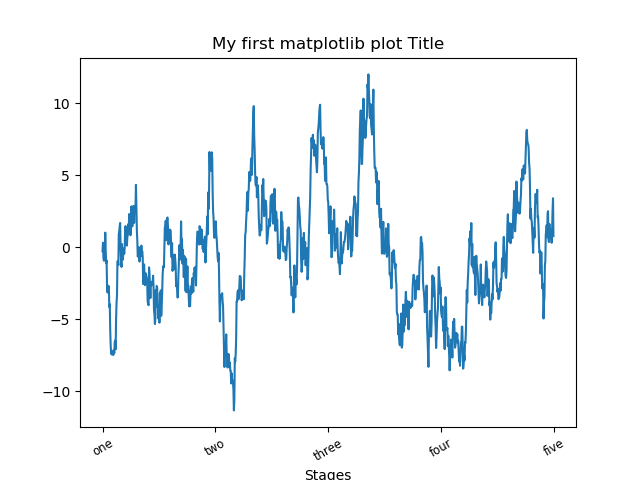

In [23]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum())

要改变x轴刻度，最简单的方式是使用`set_xticks`和`set_xticklabels`。`set_xticks`表示在数据范围内设定刻度的位置，默认情况下，这些刻度也有标签。但是可以使用`set_xticklabels`为标签赋值：

In [24]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

`rotation`选项会将x轴刻度标签旋转30度。最后，`set_xlabel`会给x轴一个名称，`set_title`会给子图一个标题：

In [25]:
ax.set_title('My first matplotlib plot')

Text(0.5,1,'My first matplotlib plot')

In [26]:
ax.set_xlabel('Stages')

Text(0.5,10.7639,'Stages')

修改y轴坐标是相同过程，将上面示例中的x替换成y即可。轴的类型拥有一个`set`方法，允许批量设置绘图属性。根据之前的示例，可以写如下代码：

In [27]:
props = {
    'title': 'My first matplotlib plot Title',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5,10.7639,'Stages'), Text(0.5,1,'My first matplotlib plot Title')]

#### 9.1.3.2　添加图例

图例是用来区分绘图元素的另一个重要内容。有多种方式可以添加图例。最简单的方式是在添加每个图表时传递label参数：

<IPython.core.display.Javascript object>


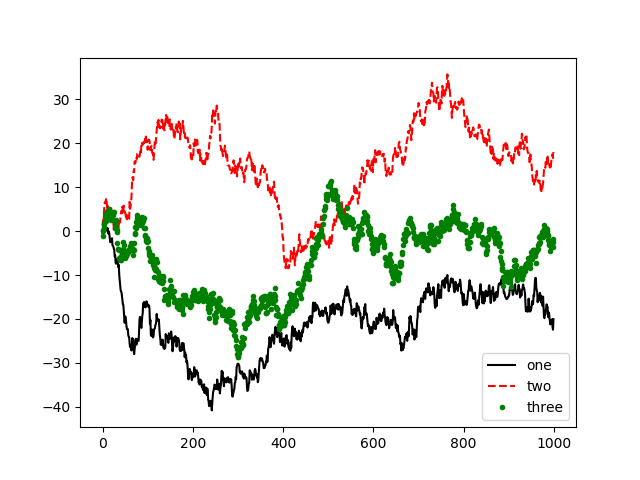

In [28]:
from numpy.random import randn

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [29]:
ax.plot(randn(1000).cumsum(), 'r--', label='two')

In [30]:
ax.plot(randn(1000).cumsum(), 'g.', label='three')

一旦运行了上面的代码，也可以调用ax.legend（）或plt.legend自动生成图例。

In [31]:
ax.legend(loc='best')

> `legend`方法有多个其他的位置参数`loc`。参考文档字符串（使用`ax.legend？`命令）获取更多信息。

loc参数告诉matplotlib在哪里放置图表。如果不挑剔，`'best'`是一个好选项，它会自动选择最合适的位置。如果取消图例中的元素，不要传入label参数或者传入`label='_nolegend_'`。

### 9.1.4　注释与子图加工
除了标准的绘图类型，可能还会想在图表上绘制自己的注释，而且注释中可能会包含文本、箭头以及其他图形。可以使用`text`、`arrow`和`annote`方法来添加注释和文本。`text`在图表上给定的坐标(x，y)，根据可选的定制样式绘制文本：
```python
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
```
注释可以同时绘制文本和箭头。作为一个例子，绘制标普500指数从2007年以来的收盘价（从雅虎财经获得数据），并在图表中标注从2008年到2009年金融危机中的重要日期。代码运行结果：

<IPython.core.display.Javascript object>


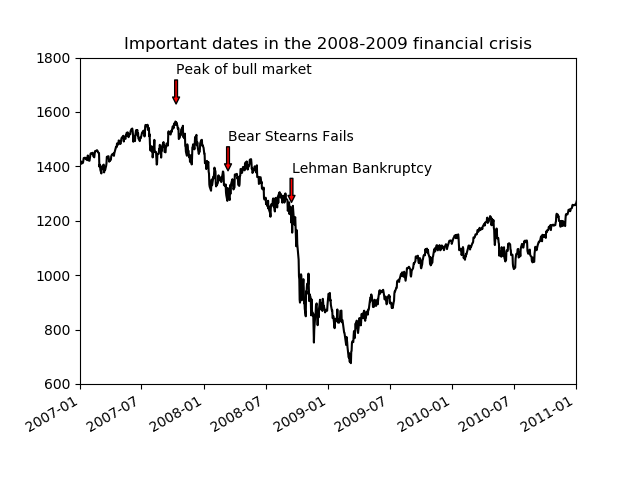

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

In [32]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='red', headwidth=5, width=2,
                                headlength=5),
                horizontalalignment='left', verticalalignment='top')

# 放大2007年~2010年
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

在图表中有一些重要点需要凸显：`ax.annotate`方法可以在指定的x和y坐标上绘制标签。可以使用`set_xlim`和`set_ylim`方法手动设置图表的边界，而不是使用matplotlib的默认设置。最后，`ax.set_title`给图表添加了一个主标题。

参考在线的matplotlib展览馆，可以学习更多注释的范例。

绘制图形时有更多需要注意的地方。matplotlib含有表示多种常见图形的对象，这些对象的引用是`patches`。一些图形，比如Rectangle（矩形）和Circle（圆形），可以在matplotlib.pyplot中找到，但图形的全集位于`matplotlib.patches`。

想在图表中添加图形时，你需要生成`patch`（补丁）对象`shp`，并调用`ax.add_patch(shp)`将它加入到子图中：

<IPython.core.display.Javascript object>


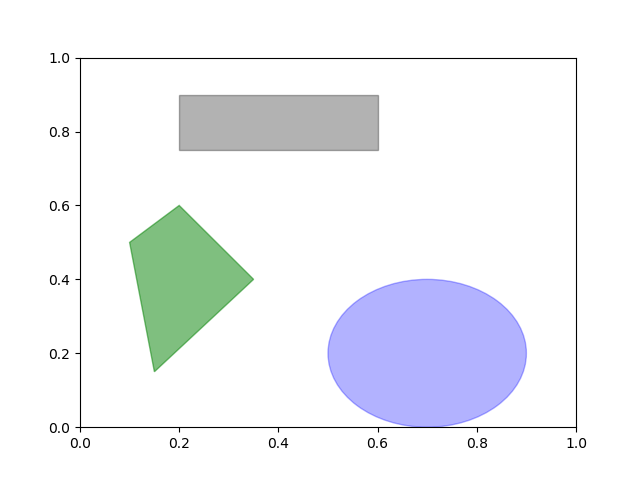

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.2, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6],[0.1, 0.5]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

当看到很多常见绘图类型的实现时，会发现他们都是由`patches`组装而来。

### 9.1.5　将图片保存到文件
可以使用`plt.savefig`将活动图片保存到文件。这个方法等价于图片对象的`savefig`实例方法。例如将图片保存为SVG，只需要输入以下代码：
```
plt.savefig('figpath.svg')
```
文件类型是从文件扩展名中推断出来的。所以如果使用.pdf，则会得到一个PDF。常使用几个重要的选项来发布图形：`dpi`，它控制每英寸点数的分辨率；`bbox_inches`，可以修剪实际图形的空白。为了得到同样一个PNG图片，且使用最小的空白，拥有400DPI，需要运行以下代码：
```
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```
saveifg并非一定是写到硬盘的，它可以将图片写入到所有的文件型对象中，例如BytesIO：

<IPython.core.display.Javascript object>


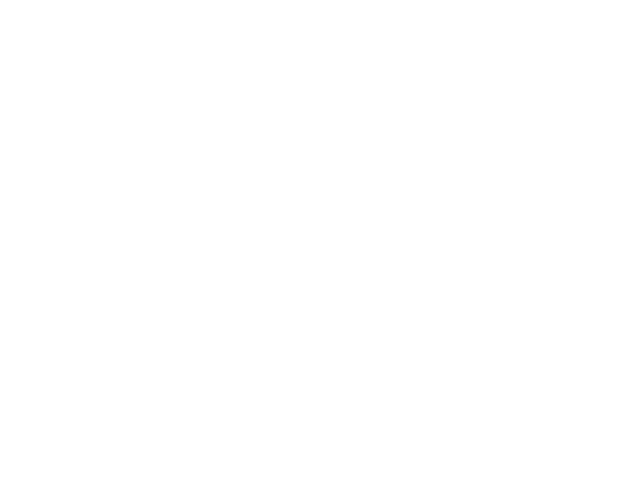

In [34]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

下表是`savefig`其他选项的列表。

### 9.1.6　matplotlib设置
matplotlib配置了配色方案和默认设置，主要用来准备用于发布的图片。幸运的是，几乎所有的默认行为都可以通过广泛的全局参数来定制，包括图形大小、子图间距、颜色、字体大小和网格样式等等。使用`rc`方法是使用Python编程修改配置的一种方式，例如，要将全局默认数字大小设置为10×10，你可以输入：

In [35]:
plt.rc('figure', figsize=(10, 10))

`rc`的第一个参数是你想要自定义的组件，比如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等等。之后，可以按照关键字参数的序列指定新参数。字典是一种在程序中设置选项的简单方式：

In [36]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 10}
plt.rc('font', **font_options)

如果需要更深入的定制和参看全量选项，可以参考matplotlib的设置文件`matplotlibrc`，该文件位于`matplotlib/mpl-data`路径。如果定制了这个文件，并将他放置在home路径下并且文件名为`.matplotlibrc`，则每次使用matplotlib时都会读取该文件。

## 9.2　使用pandas和seaborn绘图
matplotlib是一个相当底层的工具。可以从其基本组件中组装一个图表：数据显示（即绘图的类型：线、条、框、散点图、轮廓等）、图例、标题、刻度标记和其他注释。

在pandas中，可能有多个数据列，并且带有行和列的标签。pandas自身有很多内建方法可以简化从DataFrame和Series对象生成可视化的过程。另一个库是`seaborn`（https://seaborn.pydata.org/ ），它是由Michael Waskom创建的统计图形库。`seaborn`简化了很多常用可视化类型的生成。

> 导入`seaborn`会修改默认的matplotlib配色方案和绘图样式，这会提高图表的可读性和美观性。即不使用seaborn的API，可能更喜欢导入`seaborn`来为通用matplotlib图表提供更好的视觉美观度。

### 9.2.1　折线图
Series和DataFrame都有一个`plot`属性，用于绘制基本的图形。默认情况下，`plot()`绘制的是折线图：

<IPython.core.display.Javascript object>


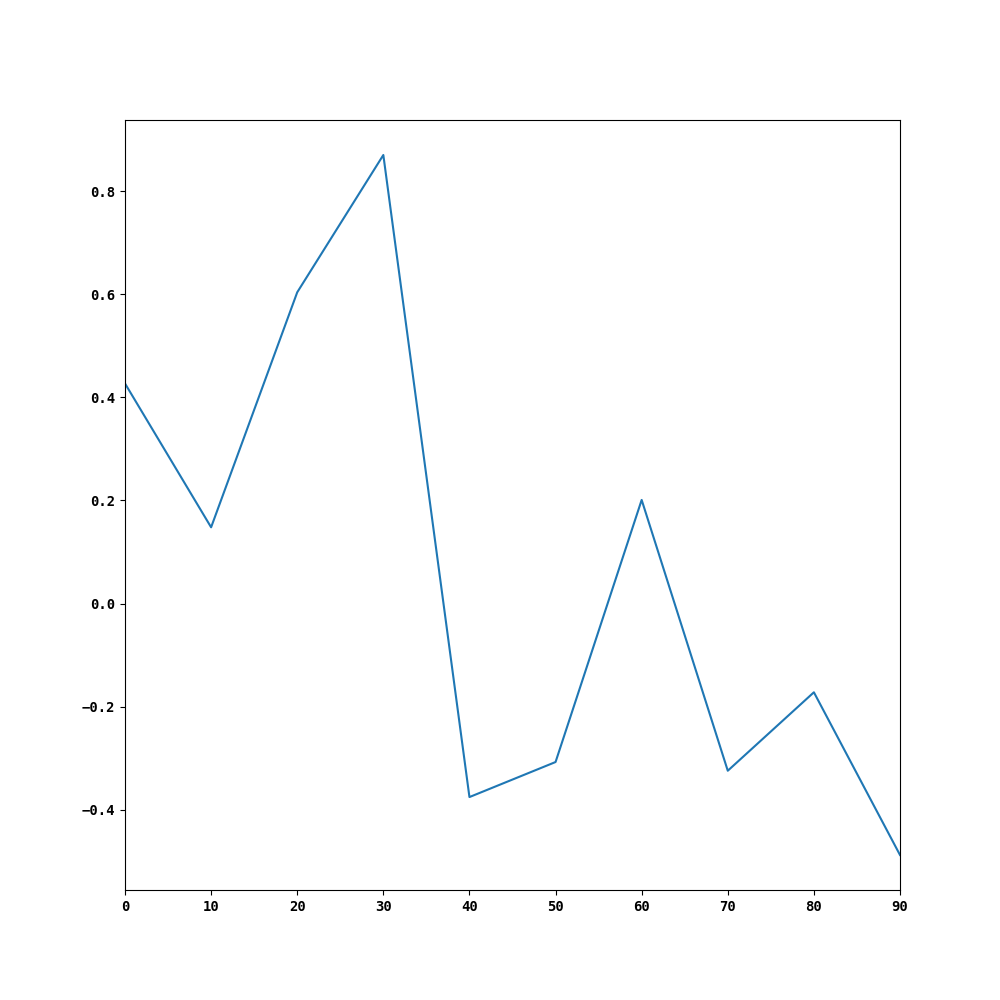

In [37]:
fig = plt.figure()
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

Series对象的索引传入matplotlib作为绘图的x轴，可以通过传入`use_index=False`来禁用这个功能。x轴的刻度和范围可以通过`xticks`和`xlim`选项进行调整，相应地y轴使用`yticks`和`ylim`进行调整。下表是plot的全部选项列表。

大部分pandas的绘图方法，接收可选的`ax`参数，该参数可以是一个matplotlib子图对象。可以更为灵活地在网格布局中放置子图。

DataFrame的`plot`方法在同一个子图中将每一列绘制为不同的折线，并自动生成图例：

In [38]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-1.743534,-0.389963,0.033779,0.032207
10,-0.168684,0.189660,-0.852051,0.048025
20,-0.073932,-1.078475,-1.116264,0.014098
30,0.645717,-1.895744,0.638688,0.689835
40,-1.080698,-1.723206,0.506240,-0.346007
50,-0.737872,-2.350894,0.928763,1.362090
60,-1.845745,-3.012467,2.599129,0.842723
70,-1.407512,-1.978883,4.259309,-0.398800
80,-1.505248,-1.232321,3.159452,-1.328265
90,-2.726415,-1.804791,1.233846,-1.675373


<IPython.core.display.Javascript object>


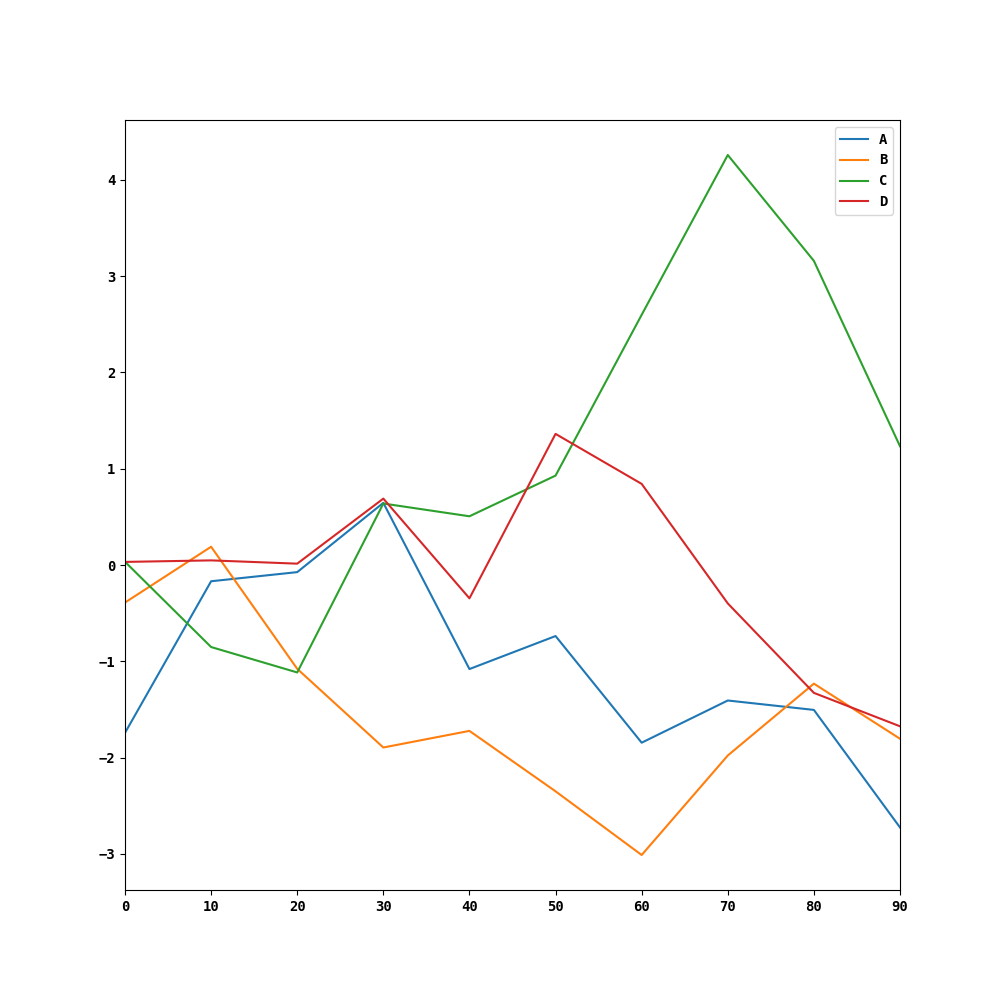

In [39]:
df.plot()

plot属性包含了不同绘图类型的方法族。例如，`df.plot()`等价于`df.plot.line()`。

> plot的其他关键字参数会传递到相应的matplotlib绘图函数，因此你可以通过了解更多的matplotlib的API信息来进一步定制这些图表。

Series.plot方法参数

DataFrame拥有多个选项，允许灵活地处理列。例如，是否将各列绘制到同一个子图中，或为各列生成独立的子图。

下表是DataFrame的`plot`参数

### 9.2.2　柱状图
`plot.bar()`和`plot.barh()`可以分别绘制垂直和水平的柱状图。在绘制柱状图时，Series或DataFrame的索引将会被用作x轴刻度（bar）或y轴刻度（barh）

<IPython.core.display.Javascript object>


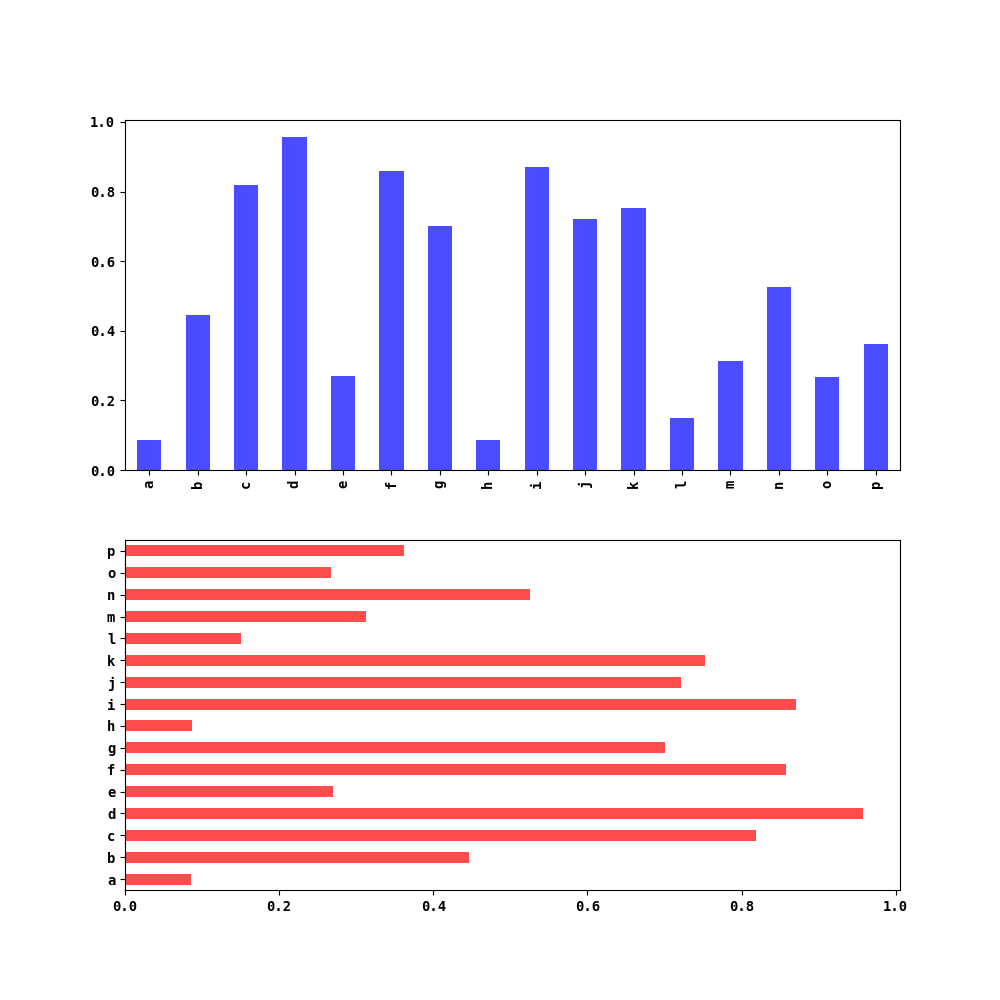

In [40]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='b', alpha=0.7)
data.plot.barh(ax=axes[1], color='r', alpha=0.7)

选项`color='b'`和`alpha=0.7`将柱子的颜色设置为蓝色，并将图像的填充色设置为部分透明。

在DataFrame中，柱状图将每一行中的值分组到并排的柱子中的一组。

In [41]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.209595,0.184988,0.043101,0.450916
two,0.250814,0.773349,0.680182,0.116371
three,0.590141,0.083948,0.335251,0.289197
four,0.498581,0.183882,0.345993,0.479202
five,0.938032,0.525562,0.807009,0.738531
six,0.464186,0.580979,0.209133,0.432340


<IPython.core.display.Javascript object>


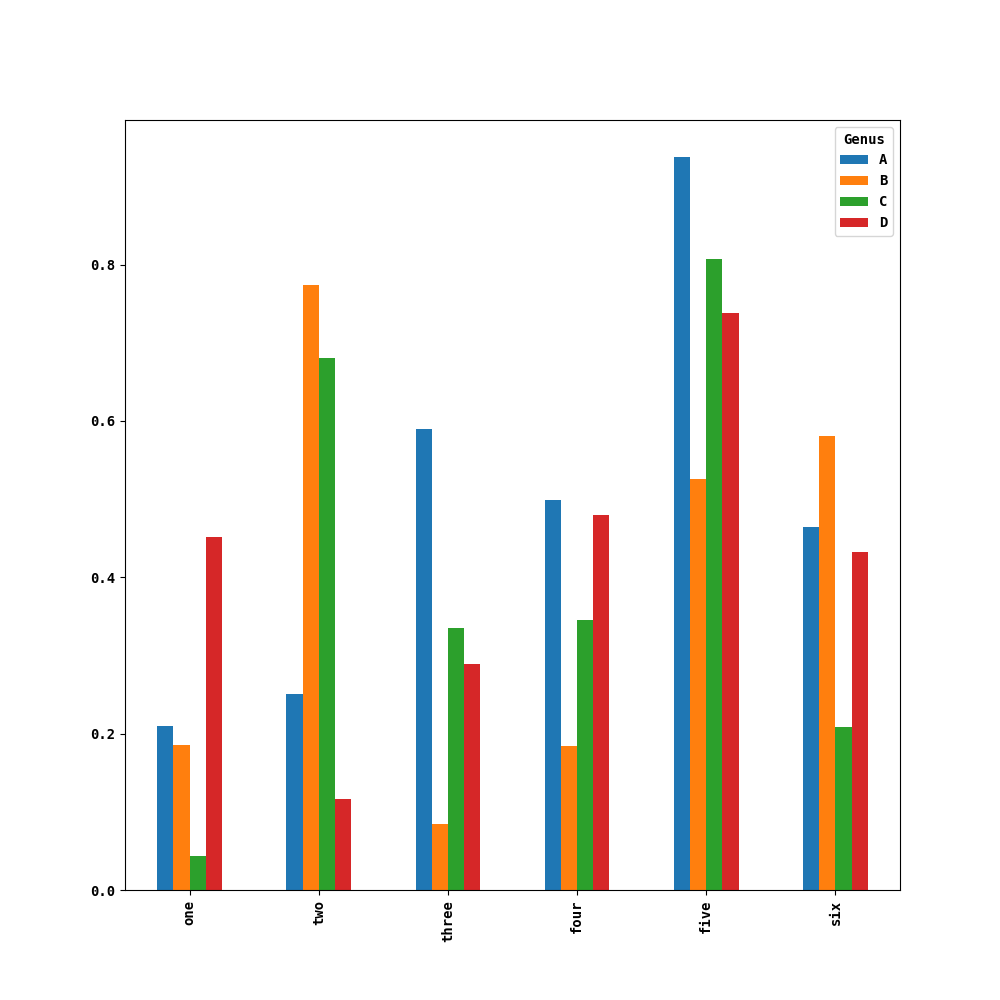

In [42]:
df.plot.bar()

请注意DataFrame的列名称"Genus"被用作了图例标题。可以通过传递`stacked=True`来生成堆积柱状图，会使得每一行的值堆积在一起：

<IPython.core.display.Javascript object>


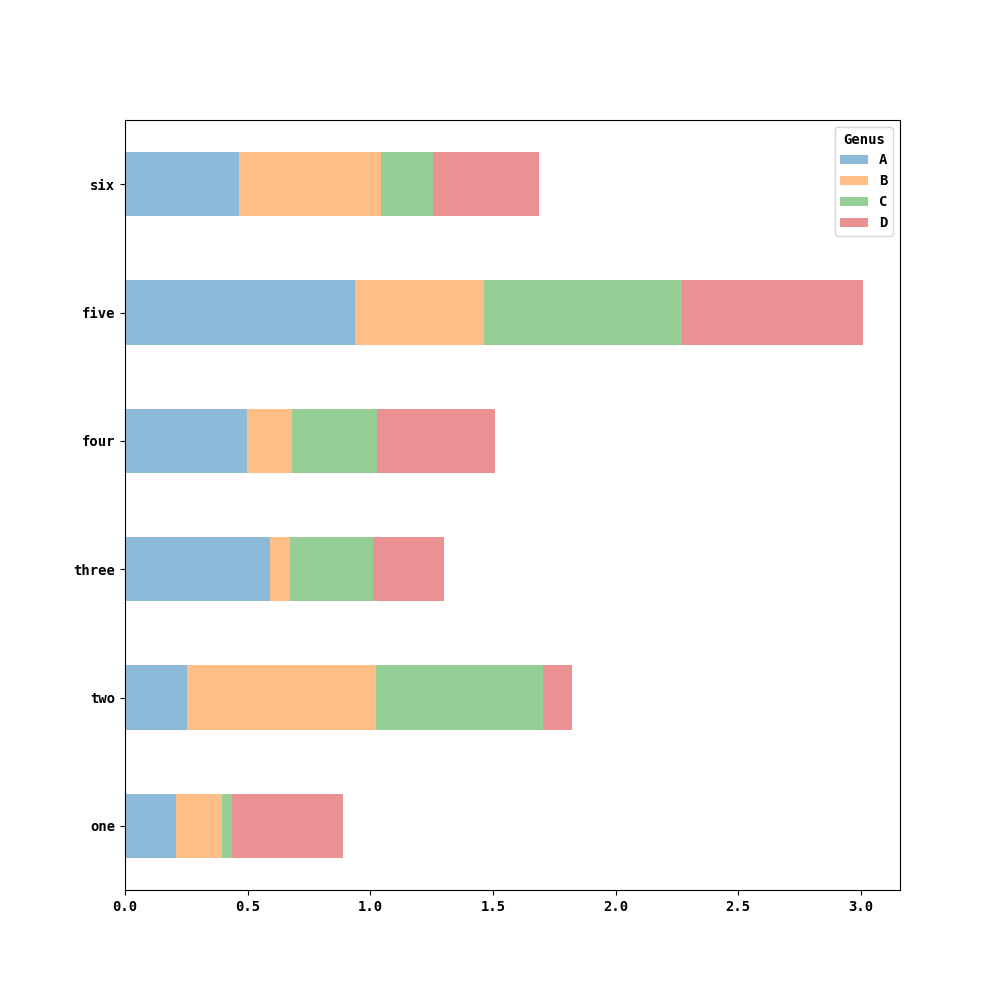

In [43]:
df.plot.barh(stacked=True, alpha=0.5)

> 使用value_counts：`s.value_counts().plot.bar()`可以有效地对Series值频率进行可视化。

回到之前使用的数据集，假设想要绘制一个堆积柱状图，用于展示每个派对在每天的数据点占比。使用`read_csv`载入数据，并根据星期日期和派对规模形成交叉表：

In [44]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [45]:
party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [46]:
# 没有太多的1人和6人派对
party_counts = party_counts.loc[:, 2:5]

之后，进行标准化以确保每一行的值和为1，然后进行绘图：

In [47]:
# 标准化至和为1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


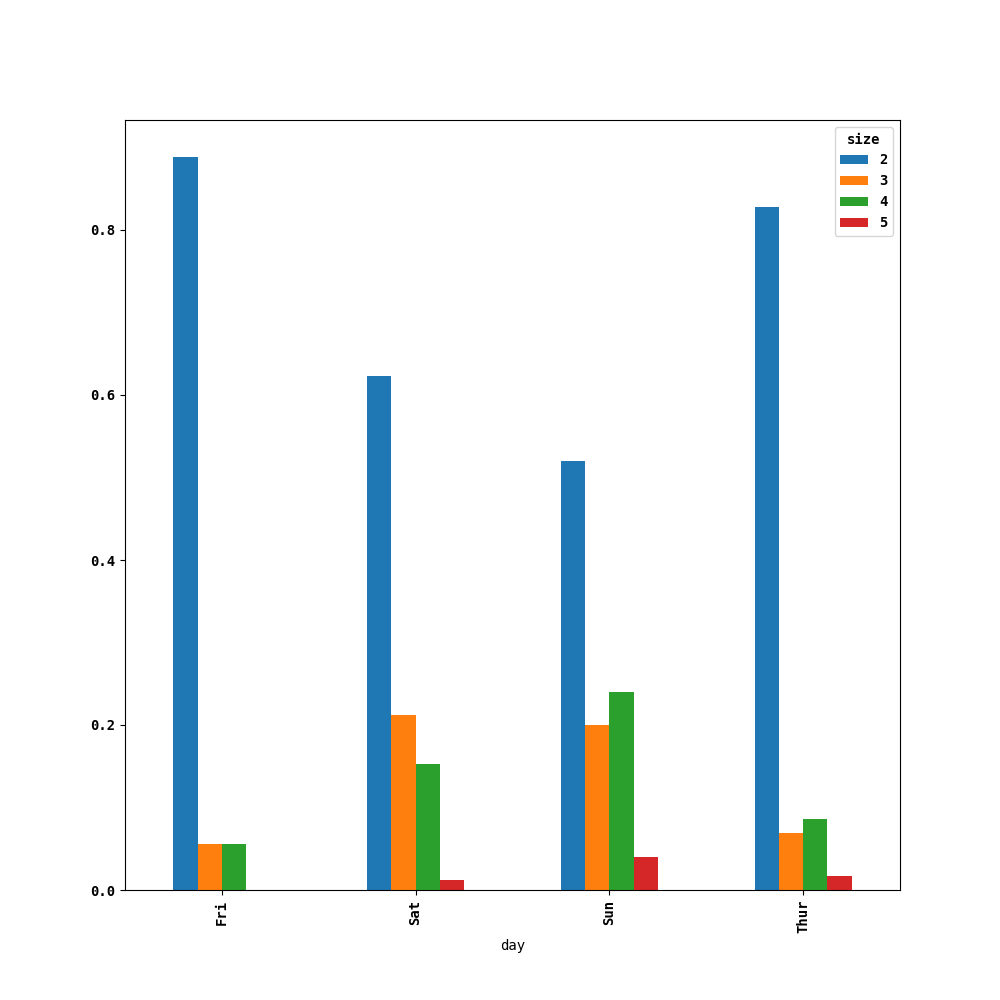

In [48]:
party_pcts.plot.bar()

可以看到本数据集中的派对数量在周末会增加。

对于在绘图前需要聚合或汇总的数据，使用`seaborn`包会使工作更为简单。现在看下使用`seaborn`进行按星期日期计算小费百分比：

In [49]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


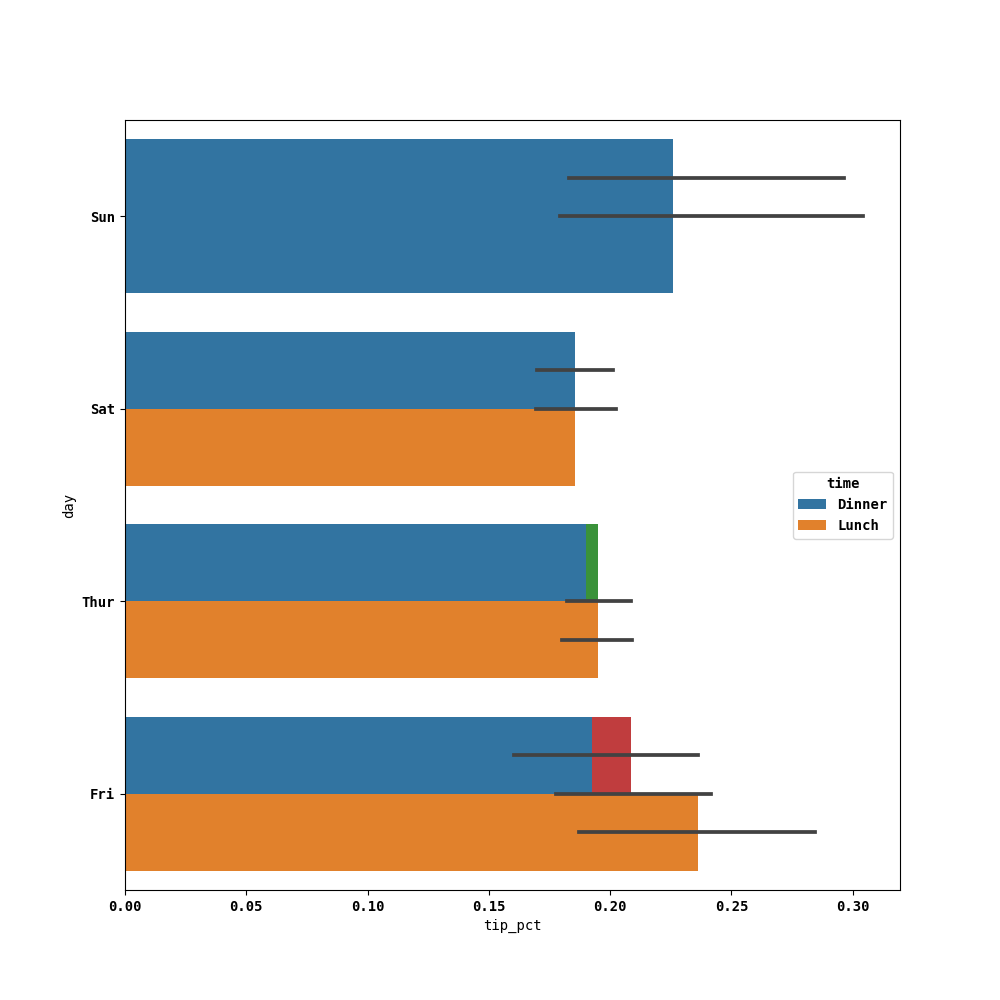

In [50]:
fig = plt.figure()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

`seaborn`中的绘图函数使用一个data参数，这个参数可以是pandas的DataFrame。其他的参数则与列名有关。

> 因为day列中有多个观测值，柱子的值是tip_pct的平均值。柱子上画出的黑线代表的是95%的置信区间（置信区间可以通过可选参数进行设置）。

`seaborn.barplot`拥有一个`hue`选项，允许过一个额外的分类值将数据分离：

In [51]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

> seaborn自动改变了图表的美观性：默认的调色板、图背景和网格线条颜色。可以使用`seaborn.set`在不同的绘图外观中进行切换：

In [52]:
sns.set(style="whitegrid")

### 9.2.3　直方图和密度图
直方图是一种条形图，用于给出值频率的离散显示。数据点被分成离散的，均匀间隔的箱，并且绘制每个箱中数据点的数量。使用之前的小费数据，可以使用Series的`plot.hist`方法制作小费占总费用百分比的直方图：

<IPython.core.display.Javascript object>


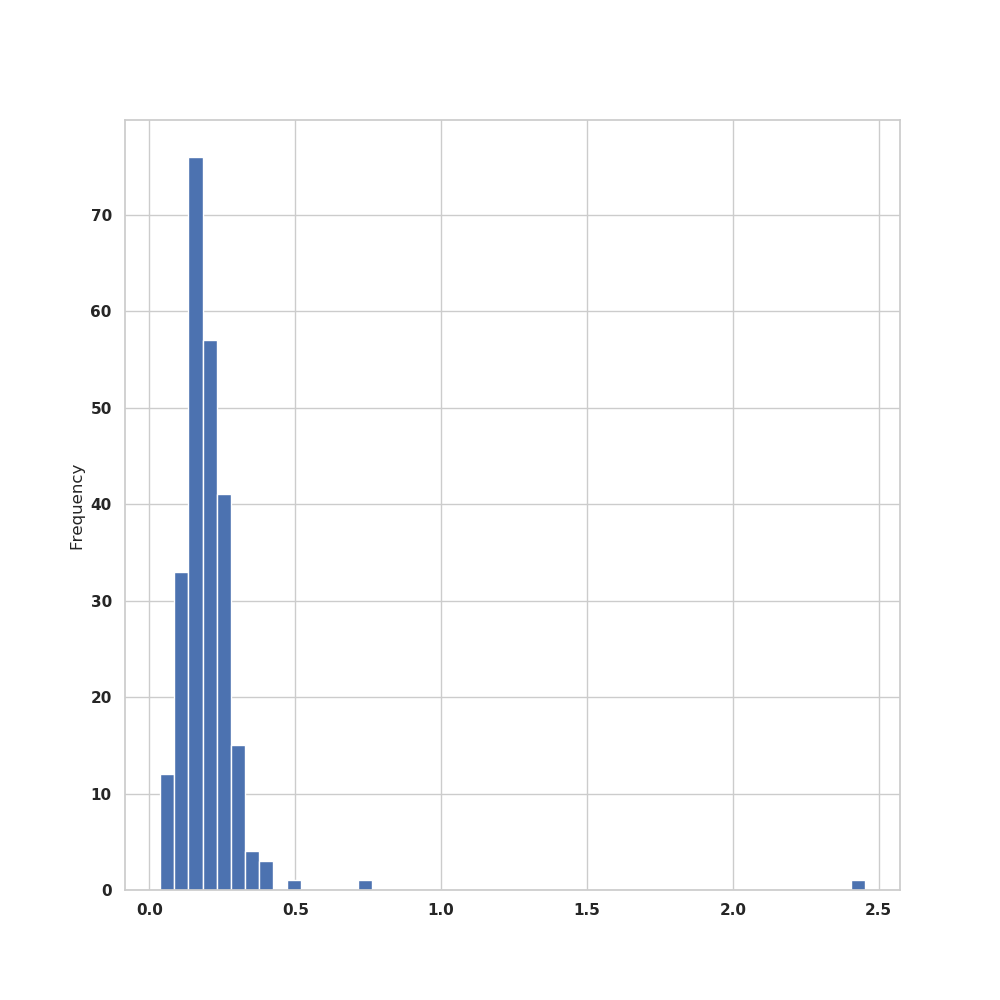

In [53]:
fig = plt.figure()
tips['tip_pct'].plot.hist(bins=50)

密度图是一种与直方图相关的图表类型，它通过计算可能产生观测数据的连续概率分布估计而产生。通常的做法是将这种分布近似为“内核”的混合，也就是像正态分布那样简单的分布。因此，密度图也被称为内核密度估计图（KDE）。plot.kde使用传统法定混合法估计绘制密度图：

<IPython.core.display.Javascript object>


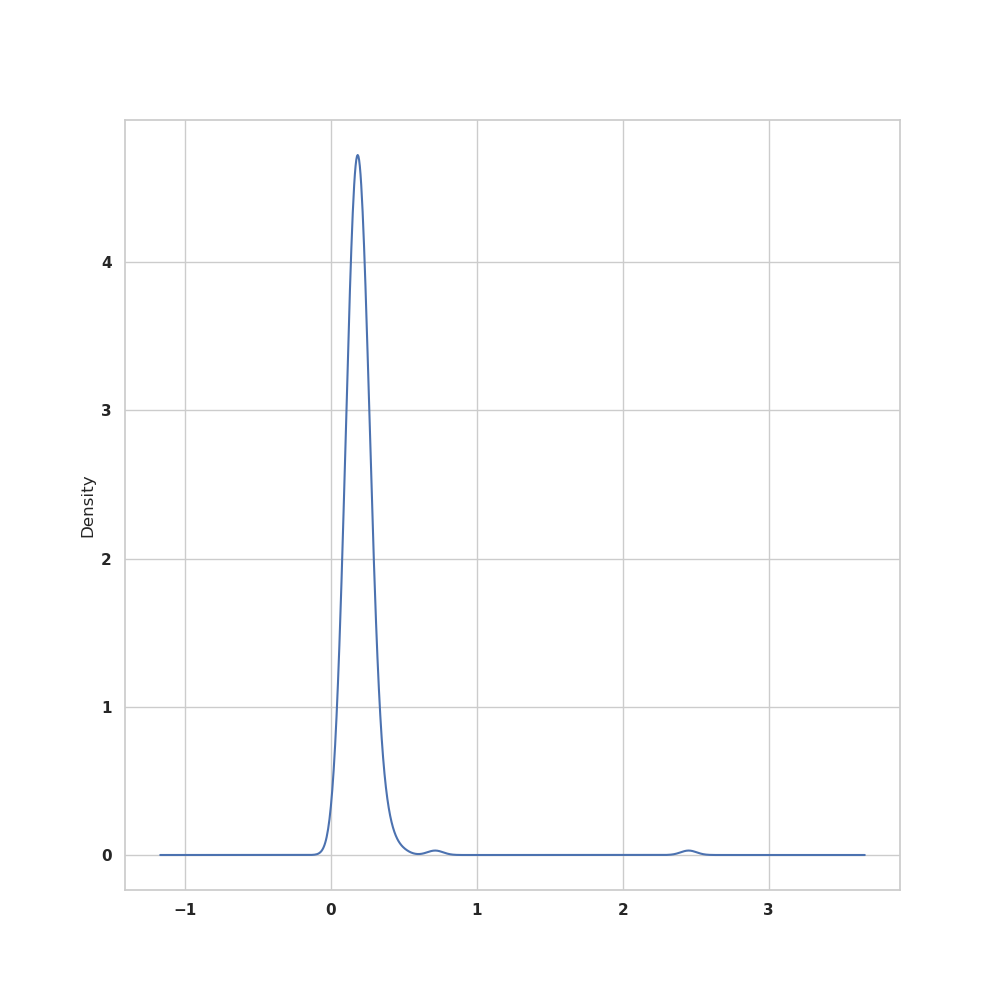

In [54]:
fig = plt.figure()
tips['tip_pct'].plot.density()

`distplot`方法可以绘制直方图和连续密度估计，通过`distplot`方法seaborn使直方图和密度图的绘制更为简单。作为例子，考虑由两个不同的标准正态分布组成的双峰分布：

In [55]:
comp1 = np.random.normal(0, 1, size=200)

comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


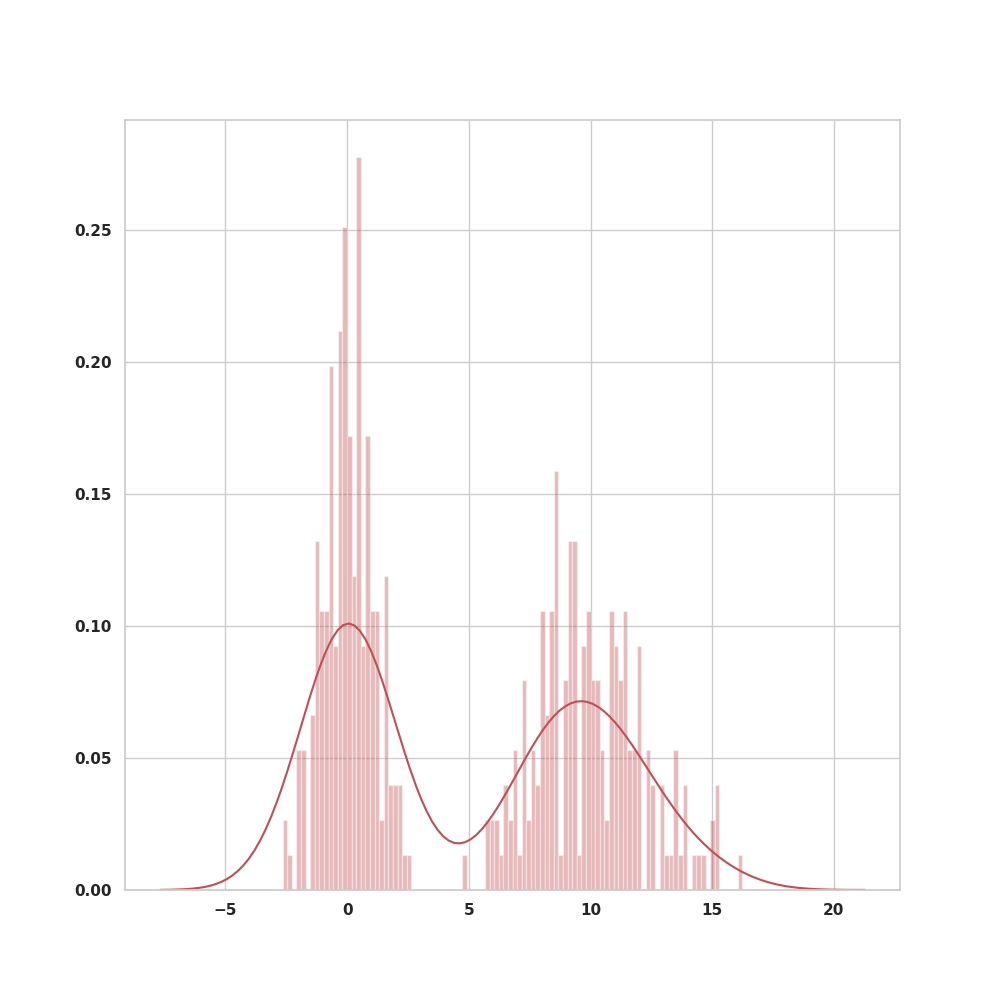

In [56]:
fig = plt.figure()
sns.distplot(values, bins=100, color='r')

### 9.2.4　散点图或点图
点图或散点图可以用于检验两个一维数据序列之间的关系。例如，从`statsmodels`项目中载入了macrodata数据集，并选择了一些变量，之后计算对数差：

In [57]:
macro = pd.read_csv('examples/macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

# numpy.diff 计算后一个值减去前一个值
trans_data = np.log(data).diff().dropna()

trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


然后可以使用seaborn的`regplot`方法，该方法可以绘制散点图，并拟合出一个条线性回归线：

<IPython.core.display.Javascript object>


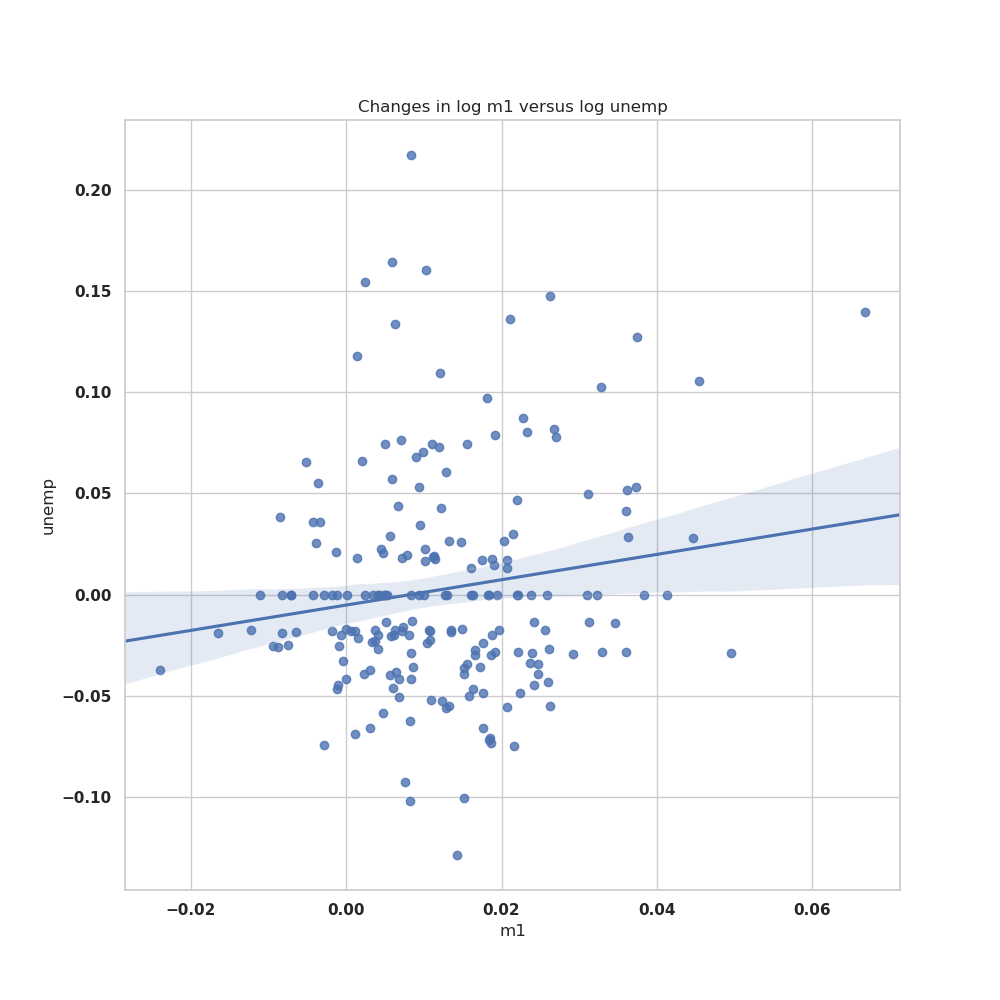

In [58]:
fig = plt.figure()
sns.regplot('m1', 'unemp', data=trans_data)
# 这种方式一样
# sns.regplot(trans_data.m1, trans_data.unemp)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))
plt.show()

在探索性数据分析中，能够查看一组变量中的所有散点图是有帮助的，这被称为成对图或散点图矩阵。从头开始绘制这样一个图是有点工作量的，所以seaborn有一个方便的`pairplot`函数，它支持在对角线上放置每个变量的直方图或密度估计值：

<IPython.core.display.Javascript object>


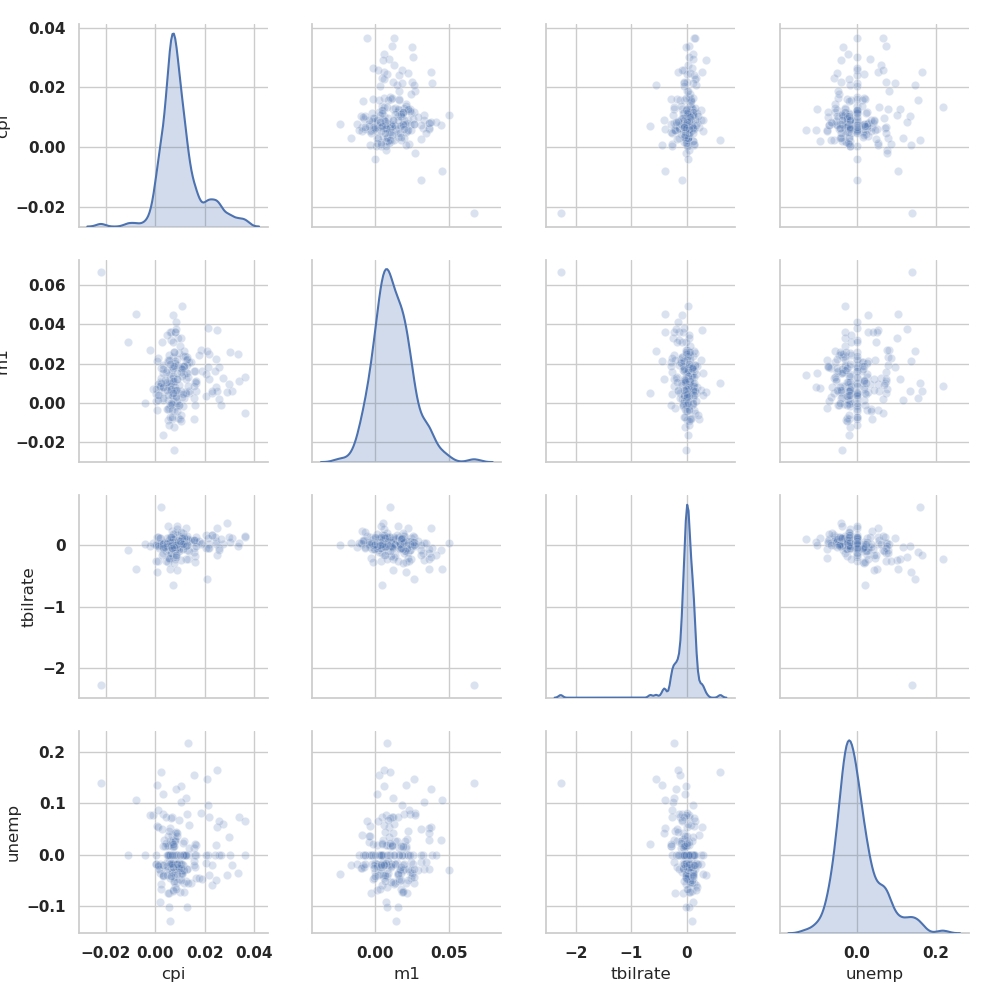

In [59]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

注意到`plot_ksw`参数，这个参数能够将配置选项传递给非对角元素上的各个绘图调用。参考`seaborn.pairplot`的文档字符串可以看到更多细节的设置选项。

### 9.2.5　分面网格和分类数据
如果数据集有额外的分组维度怎么办？使用分面网格是利用多种分组变量对数据进行可视化的方式。seaborn拥有一个有效的内建函数`factorplot`（目前的版本更名为`catplot`），它可以简化多种分面绘图：

<IPython.core.display.Javascript object>


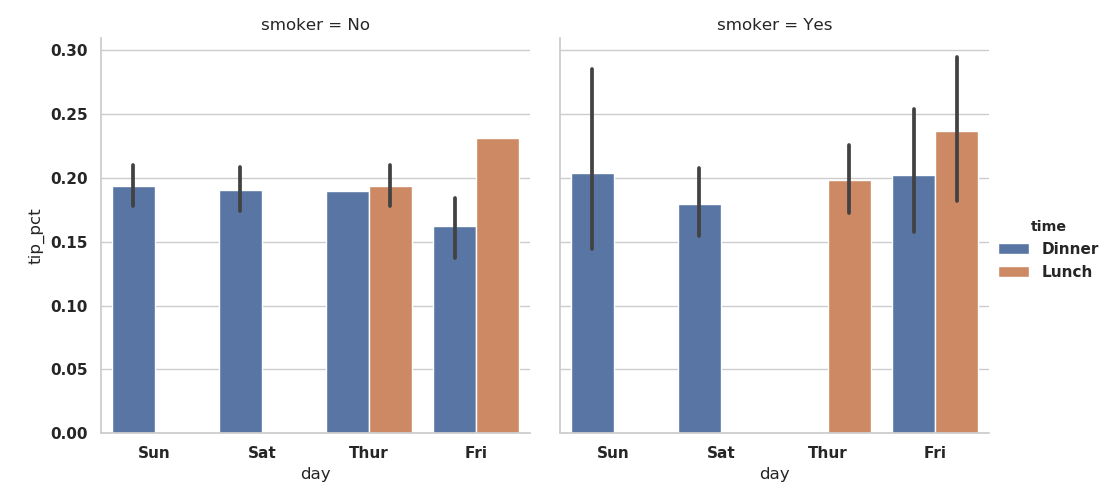

In [60]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
            kind='bar', data=tips[tips.tip_pct < 1])

除了根据'time'在一个面内将不同的柱分组为不同的颜色，还可以通过每个时间值添加一行来扩展分面网格：

<IPython.core.display.Javascript object>


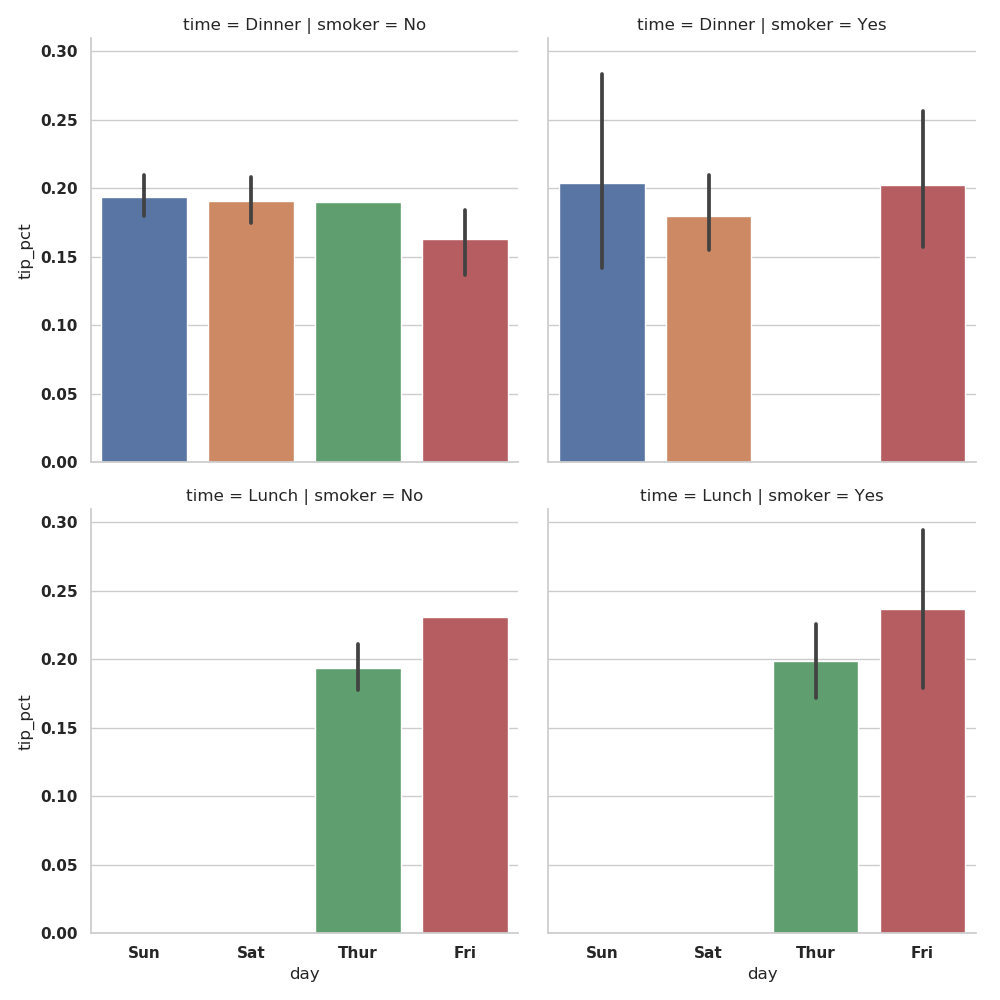

In [61]:
sns.catplot(x='day', y='tip_pct', row='time',
            col='smoker',
            kind='bar', data=tips[tips.tip_pct < 1])   

`catplot`支持其他可能有用的图类型，具体取决于要显示的内容。例如，箱形图（显示中位值、四分位数和异常值）可以是有效的可视化类型：

<IPython.core.display.Javascript object>


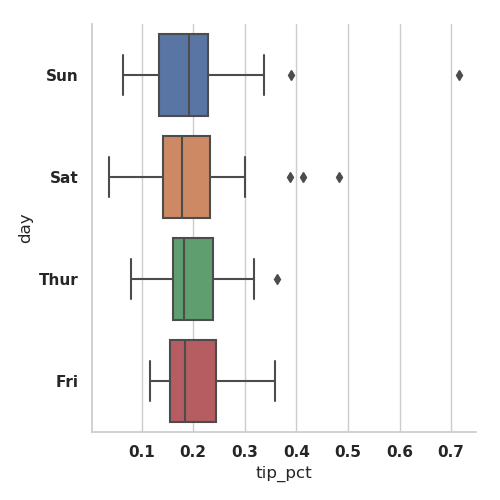

In [62]:
sns.catplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 1])

可以使用更通用的`seaborn.FacetGrid`类创建自己的分面网格图。具体请查看更多的seaborn文档（https://seaborn.pydata.org/ ）。
> 虽然会画图，但是这些图片表达的意思，还是要进一步的学习！

## 9.3　其他Python可视化工具
和开源代码一样，在Python语言下创建图形的选择有很多。自2010年以来，很多开发工作都集中在创建web交互式图形上。借助像Bokeh（http://bokeh.pydata.org/ ）和Plotly（https://github.com/plotly/plotly.py ）这样的工具，在web浏览器中创建动态的、交互式图像的工作现在已经可以实现。

如果是创建用于印刷或网页的静态图形，建议根据需要使用默认的matplotlib以及像pandas和seaborn这样的附加库。对于其他数据可视化要求，学习其他可用工具之一可能是有用的。探索Python可视化生态系统，因为它将持续增添新内容并在未来进行更多创新。